# Notebook for Explosive Production Chemical Reaction Network

Explosive Production Chemical Reaction Network: $S \xrightarrow{\theta} 2S$.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch
import matplotlib.pyplot as plt

import neuralnetwork
import convert_csv
import plot
import save_load_MDN

from scipy.stats import nbinom
from scipy.special import comb

from CRN3_explosive_production import propensities_explosive_production as propensities

## Importing data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'explosive_production'
NUM_PARAMS = 1

In [3]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

INIT_STATE = 5

## Hyperparameters

In [4]:
LR = 0.005
BATCHSIZE = 64
N_ITER = 500
N_HIDDEN = 256
MIXTURE = 'NB'
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [11]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, mixture=MIXTURE)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, mixture=MIXTURE)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, mixture=MIXTURE)

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [12]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Training ...: 100%|█████████▉| 499/500 [18:06<00:02,  2.18s/it]


Learning rate: 4.934785965721164e-08,
Train loss: 0.1600360870361328,
 Valid loss: 0.16548912227153778


Training ...: 100%|█████████▉| 499/500 [16:51<00:02,  2.03s/it]


Learning rate: 4.934785965721164e-08,
Train loss: 0.15925031900405884,
 Valid loss: 0.16487783193588257


Training ...: 100%|█████████▉| 499/500 [16:49<00:02,  2.02s/it]

Learning rate: 4.934785965721164e-08,
Train loss: 0.15867875516414642,
 Valid loss: 0.16051071882247925


In [21]:
for i, model in enumerate([model1, model2, model3]):
    save_load_MDN.save_MDN_model(model, f'EP_model{i+1}.pt')

## Loading models

In [5]:
model1 = save_load_MDN.load_MDN_model('saved_models/EP_model1.pt')
model2 = save_load_MDN.load_MDN_model('saved_models/EP_model2.pt')
model3 = save_load_MDN.load_MDN_model('saved_models/EP_model3.pt')

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [20]:
# Compute losses

print("Model 1")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_hellinger)}')

print("\nModel 2")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_hellinger)}')

print("\nModel 3")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Model 1
KLD : 0.15839697420597076
Hellinger : 0.17168165743350983

Model 2
KLD : 0.15817852318286896
Hellinger : 0.17074346542358398

Model 3
KLD : 0.15807752311229706
Hellinger : 0.170466810464859


## Probability mass function

Given an initial condition $r = 5$, the population of $S$ at any later time is a random integer sampled from a Negative Binomial distribution:
$$p(x; t, \theta) = \binom{x - 1}{r-1} \big(1-e^{-t\theta}\big)^{x-r}\big(e^{-t\theta}\big)^r$$


In [22]:
def explosive_production_distribution(x, params, r=INIT_STATE):
    if x < r:
        return 0
    else:
        t, theta = params
        return nbinom.pmf(x-r, r, np.exp(-t*theta))

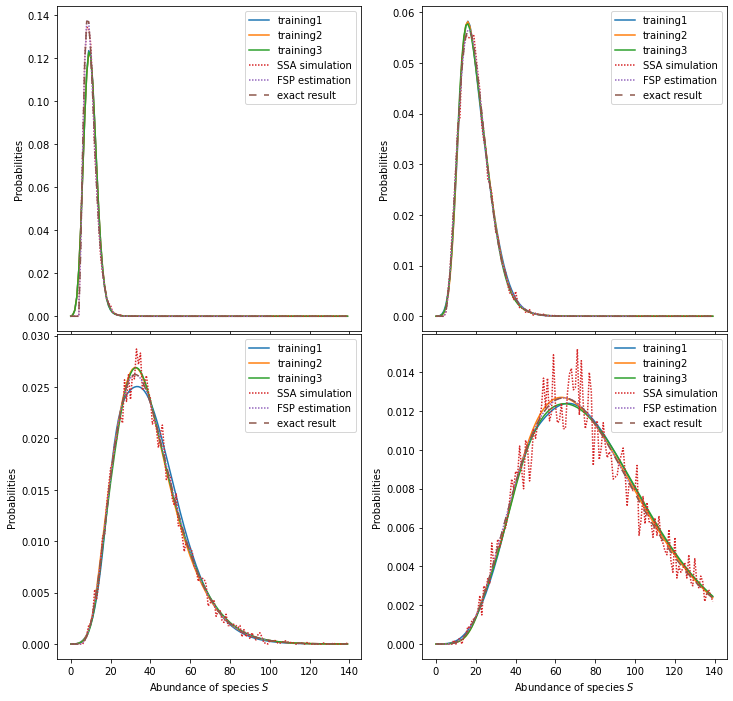

In [23]:
plot.multiple_plots(to_pred=[X_test[992+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[140]*4, 
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    plot_exact_result=(True, explosive_production_distribution),
                    plot_test_result=(True, [y_test[992+k, :] for k in range(4)]),
                    plot_fsp_result=(True,
                                    propensities.stoich_mat,
                                    propensities.propensities,
                                    None,
                                    140,
                                    propensities.init_state,
                                    propensities.ind_species,
                                    1,
                                    0),
                    save=(False, ''))

For a time further in the future than the training range:

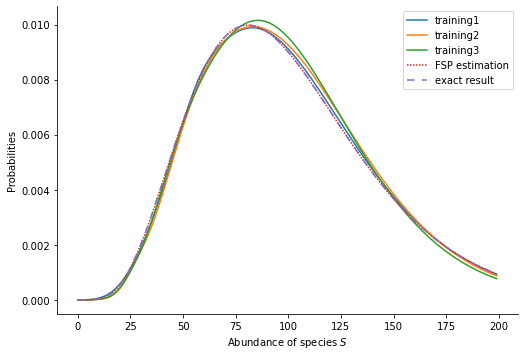

In [30]:
plot.plot_model(to_pred=torch.tensor([30., 0.1]), 
                models=[model1, model2, model3], 
                up_bound=200, 
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                plot_exact_result=(True, explosive_production_distribution),
                plot_fsp_result=(True,
                                propensities.stoich_mat,
                                propensities.propensities,
                                None,
                                200,
                                propensities.init_state,
                                propensities.ind_species,
                                1,
                                0),
                save=(False, ''))

## Sensitivity of the likelihood

$$\frac{\partial p}{\partial \theta}(x;t,\theta) = -t \ p(x;t,\theta) \Big[ \frac{(r-x)q_t^\theta}{1-q_t^\theta} + r\Big]$$

In [31]:
def explosive_production_stv(x, params, r=INIT_STATE):
    if x < r:
        return 0
    else:
        t, theta = params
        q = np.exp(-theta*t)
        return -t*explosive_production_distribution(x, params, r)*((r-x)*q/(1-q)+r)

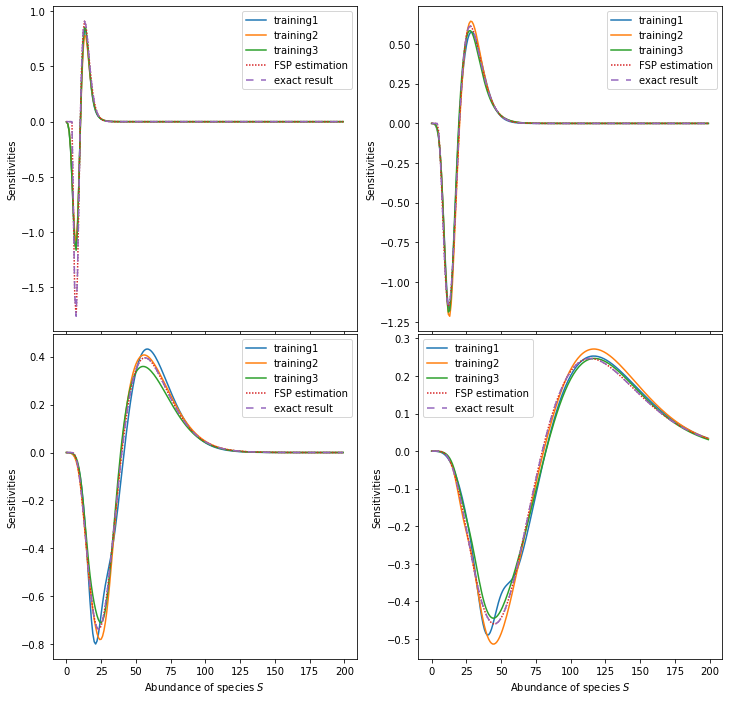

In [32]:
plot.multiple_plots(to_pred=[X_test[992+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[200]*4, 
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    index_names=('Sensitivities', r'Abundance of species $S$'), 
                    plot_exact_result=(True, explosive_production_stv),
                    plot_fsp_result=(True,
                                    propensities.stoich_mat,
                                    propensities.propensities,
                                    None,
                                    200,
                                    propensities.init_state,
                                    propensities.ind_species,
                                    1,
                                    0),
                    plot=('sensitivities', 0),
                    save=(False, ''))

For a time further in the future than the training range:

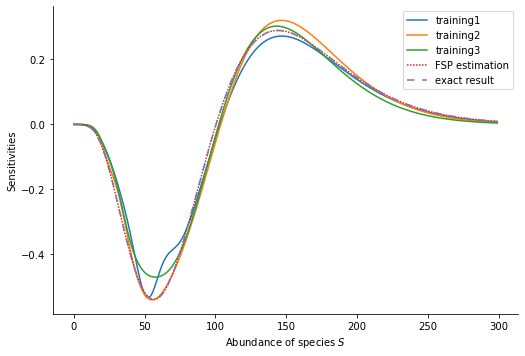

In [37]:
plot.plot_model(to_pred=torch.tensor([30., 0.1]), 
                models=[model1, model2, model3], 
                up_bound=300,
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                index_names=('Sensitivities', r'Abundance of species $S$'), 
                plot_exact_result=(True, explosive_production_stv),
                plot_fsp_result=(True,
                                propensities.stoich_mat,
                                propensities.propensities,
                                None,
                                300,
                                propensities.init_state,
                                propensities.ind_species,
                                1,
                                0),
                plot=('sensitivities', 0), 
                save=(False, ''))

## Fisher Information

$$\mathcal{I}_t^\theta = \frac{rt^2}{1-q_t^\theta}$$

In [38]:
def exact_fi(t, params, r=INIT_STATE):
    theta = params[0]
    q=np.exp(-theta*t)
    return r*t**2/(1-q)

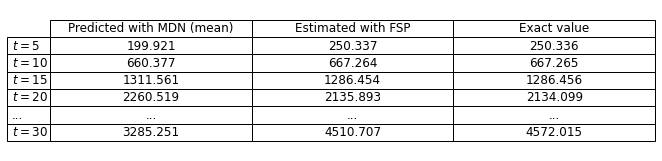

In [39]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20, 30]), 
            params=X_test[992, 1:].numpy(), 
            ind_param=0,
            time_windows=np.array([30]),
            up_bound=1_000,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_exact_result=(True, exact_fi),
            plot_fsp_result=(True,
                            propensities.stoich_mat,
                            propensities.propensities,
                            None,
                            1_000,
                            propensities.init_state,
                            propensities.ind_species,
                            1,
                            0),
            out_of_bounds_index=4,
            save=(False, 'CRN3_SI_fig16.pdf'))

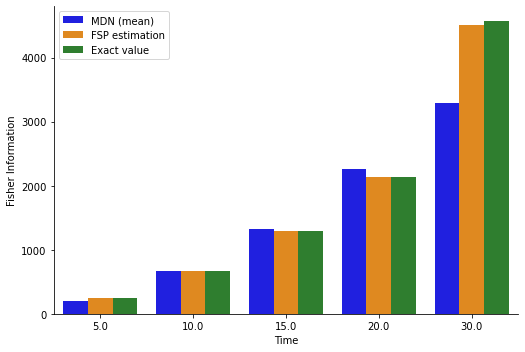

In [41]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20, 30]), 
            params=X_test[992, 1:].numpy(), 
            ind_param=0,
            time_windows=np.array([30]),
            up_bound=1_000,
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_exact_result=(True, exact_fi),
            plot_fsp_result=(True,
                            propensities.stoich_mat,
                            propensities.propensities,
                            None,
                            1_000,
                            propensities.init_state,
                            propensities.ind_species,
                            1,
                            0),
            save=(False, 'CRN3_SI_bars.pdf'),
            colors=['blue', 'darkorange', 'forestgreen'])